<a href="https://colab.research.google.com/github/eb2033/DSP-with-Python/blob/main/8QAM_Modulation_with_Noise_plotted_on_a_Constellation_Diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

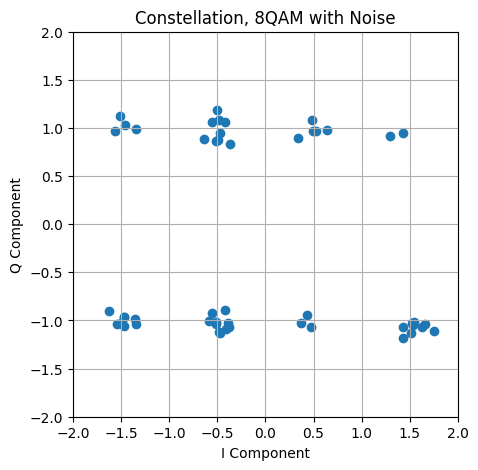

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


transmit_bits = [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1]


num_bits_8psk = len(transmit_bits)
# Ensure we have a valid number of symbols by truncating if not a multiple of 3
num_symbols_8psk = num_bits_8psk // 3

I_8psk = np.zeros(num_symbols_8psk)
Q_8psk = np.zeros(num_symbols_8psk)

# Define the 8 constellation points for a rectangular shape.
# These points are arranged to have 4 points on the positive I side
# and 4 points on the negative I side of the y-axis (I=0).
constellation_points = {
    0: (-1.5, 1),
    1: (-0.5, 1),
    2: (0.5, 1),
    3: (1.5, 1),
    4: (-1.5, -1),
    5: (-0.5, -1),
    6: (0.5, -1),
    7: (1.5, -1)
}

for i in range(num_symbols_8psk):
    # Extract 3 bits for the current symbol
    # Assuming b0 is the most significant bit for the decimal conversion logic
    b0 = transmit_bits[i * 3]
    b1 = transmit_bits[i * 3 + 1]
    b2 = transmit_bits[i * 3 + 2]

    # Convert binary triplet to a decimal index (0-7)
    symbol_index = b0 * 4 + b1 * 2 + b2 * 1

    # Map the symbol index to the rectangular constellation point
    I_8psk[i] = constellation_points[symbol_index][0]
    Q_8psk[i] = constellation_points[symbol_index][1]

#x = 1.802*np.sin(2*math.pi*100*1+0.588);
#print( np.mean(np.abs(x)**2))
amplitude = 1.802
signal_power = 0.1571134550697536
SNR = 8
standard_deviation = math.sqrt(signal_power / (2 * SNR))

# Using a normal distribution for the noise and making a random imaginary number
noise = np.random.normal(0, standard_deviation, num_symbols_8psk) + 1j * np.random.normal(0, standard_deviation, num_symbols_8psk)

sig_tx = (I_8psk + 1j*Q_8psk) + noise

# received signal
noisy_I = sig_tx.real
noisy_Q = sig_tx.imag



# Plotting the Rectangular Constellation Diagram
fig = plt.figure(figsize=(5,5), dpi=100, facecolor='w')
# Plot the real and imaginary parts of the noisy signal
plt.scatter(noisy_I, noisy_Q)

plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('I Component')
plt.ylabel('Q Component')
plt.title('Constellation, 8QAM with Noise') # Changed title to reflect noise
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
import numpy as np

# Given SNR in dB
snr_db = 8

# Existing signal power from the notebook's kernel state
signal_power = 0.991318883929199 # Using the value from kernel state for 'signal_power'

# Convert SNR from dB to linear scale
snr_linear = 10**(snr_db / 10)

# Calculate Noise Power
noise_power = signal_power / snr_linear

print(f"Signal Power: {signal_power}")
print(f"Target SNR: {snr_db} dB")
print(f"Required Noise Power: {noise_power}")

Signal Power: 0.991318883929199
Target SNR: 8 dB
Required Noise Power: 0.1571134550697536
